# **1. Install library for project**

in the beginning let's start with install easyocr and gradio

In [1]:
!pip install easyocr
!pip install gradio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
# Download sample github
!wget https://raw.githubusercontent.com/Adamrill/Image-to-text/main/testing/sample1.png
!wget https://raw.githubusercontent.com/Adamrill/Image-to-text/main/testing/sample2.jpg
!wget https://raw.githubusercontent.com/Adamrill/Image-to-text/main/testing/sample3.png

--2024-08-05 11:30:50--  https://raw.githubusercontent.com/Adamrill/Image-to-text/main/testing/sample1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29220 (29K) [image/png]
Saving to: ‘sample1.png’

sample1.png         100%[===================>]  28.54K  --.-KB/s    in 0s      

2024-08-05 11:30:51 (117 MB/s) - ‘sample1.png’ saved [29220/29220]

--2024-08-05 11:30:51--  https://raw.githubusercontent.com/Adamrill/Image-to-text/main/testing/sample2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64752 (63K) [image/jpeg]
Sa

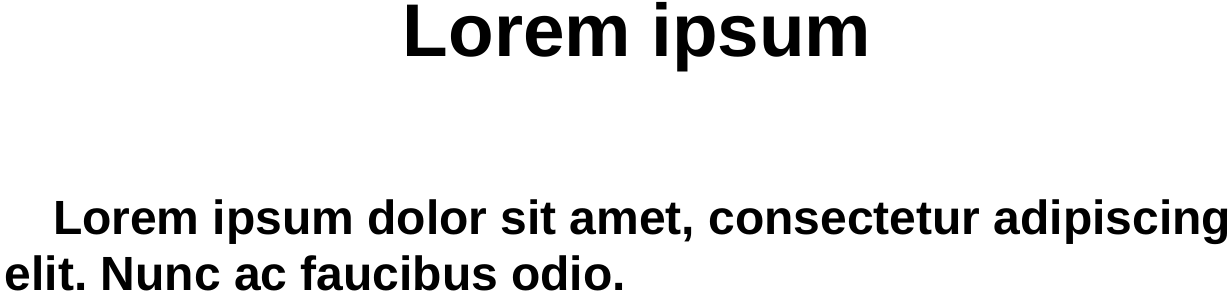

In [3]:
# test to display image
from IPython.display import Image
display(Image('sample1.png'))

# **2. Build Project**

build project with make a function to read data from image

In [4]:
import easyocr
import numpy as np

# Make reader EasyOCR
reader = easyocr.Reader(['en', 'id'])

def ocr_image(image):
    """
    Function for extract image with EasyOCR.

    Args:
    image (PIL.Image): image will be processed.

    Returns:
    str: Text extracted with ocr.
    """
    # Convert image to read with EasyOCR
    image = image.convert('RGB')
    image_np = np.array(image)

    # Using EasyOCR for extract image
    result = reader.readtext(image_np)

    # Concate result of text to one string
    extracted_text = ' '.join([text[1] for text in result])
    return extracted_text


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

# **3. Show result with gradio**

use gradio for real testing

In [6]:
import gradio as gr

# Make interface Gradio
interface = gr.Interface(
    theme=gr.themes.Soft(),
    fn=ocr_image,
    inputs=gr.Image(type='pil'),
    examples=['sample1.png', 'sample2.jpg', 'sample3.png'],
    outputs='text',
    title="OCR with EasyOCR",
    description="Only support png and jpg file",
    article="example file in english and indonesian leanguage"
)

# Launch interface Gradio
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3ffb48ab2ac7852daa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
